# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Кластеризация и понижение размерности

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлению возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, не дописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 120 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [33]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

При необходимости установите библиотеку-расширение для `plotly`, позволяющую рисовать картинки на всплывающих окнах.

    pip install dash

In [1]:
import io
import os
import base64
from PIL import Image

import seaborn
import plotly.express as pltex
import matplotlib.pyplot as matplt
from dash import Dash, dcc, html, Input, Output, no_update, callback

import numpy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
from transformers import ViTImageProcessor, ViTModel

device = "cuda" if torch.cuda.is_available() else "cpu"
seaborn.set_theme(style='whitegrid', font_scale=1.3, palette='Set2')

<font size="4"><b>Внимание! Файл с решением может быть тяжелым. Если он весит 20 Мб и более, заранее разделите его на несколько частей.</b></font>

---
### Задача 1. 

Докажите, что метод KMeans делит все пространство объектов на выпуклые многоугольники, возможно, неограниченные.

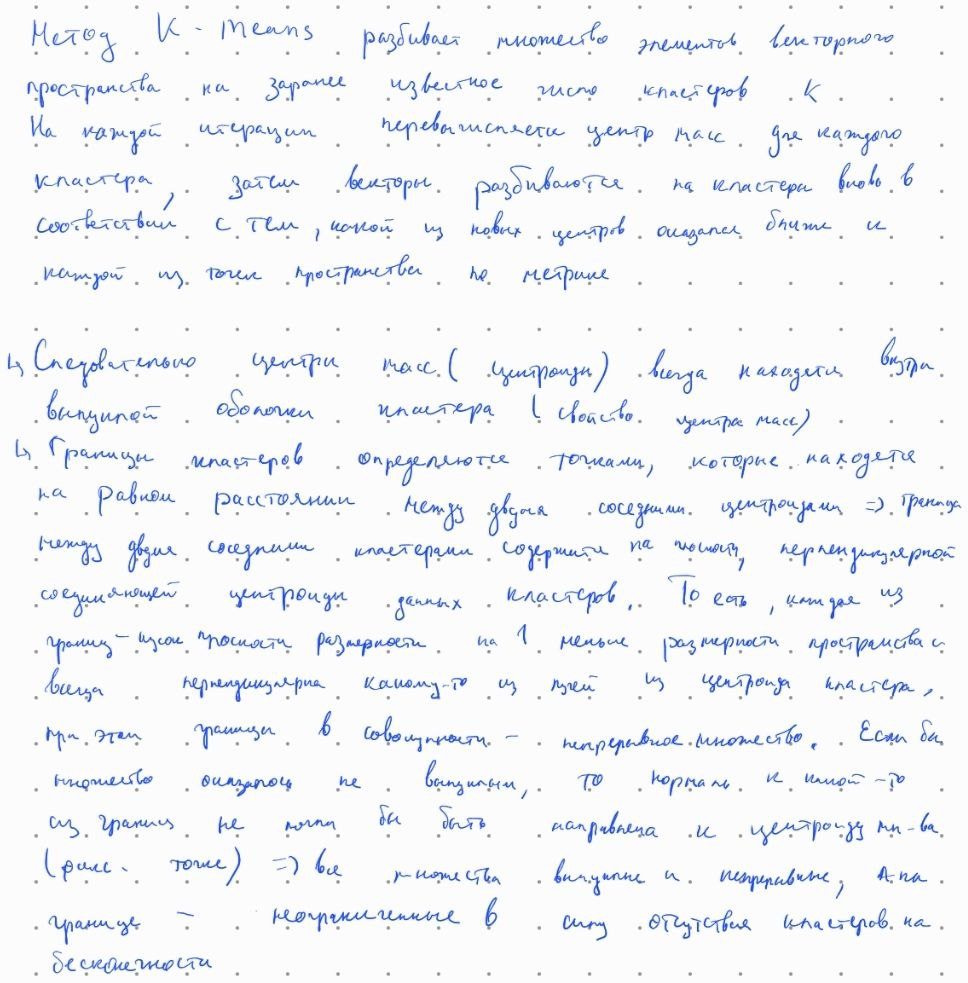

---
### Задача 2. 

Как мы знаем из <a href="https://miptstats.github.io/courses/ad_fivt/lecture8.pdf">лекции</a>, в пространствах большой размерности расстояния между случайными объектами становятся неинформативными. Эта проблема известна как *проклятие размерности*, и она влечет соответствующие ограничения на использование методов, основанных на использовании расстоянии между объектами.

В этой задаче предлагается промоделировать ситуацию понижения размерности. Сгенерируйте достаточно большое количество точек в единичном кубе в пространстве некоторой размерности. Пример кода дан ниже

In [35]:
sample_size = 10000

example_dimension = 100
example_sample = numpy.random.uniform(size=(sample_size, example_dimension))

Повторите генерацию для нескольких размерностей пространства от 2 до 1000. Используйте не менее 7 различных значений размерностей пространства.

In [36]:
point_dimensions = [2, 50, 100, 200, 400, 600, 1000]

point_samples = [numpy.random.uniform(size=(sample_size, dimension)) for dimension in point_dimensions]

Для каждой размерности посчитайте норму каждой точки, тем самым получая набор значений расстояния от 0 до случайной точки. Нормируйте все расстояния, поделив на среднее полученных расстояний для каждой размерности пространства.

- Определим функцию, возвращающую нормированные значения расстояний

In [37]:
def count_normalized(sample):
    distance = numpy.linalg.norm(sample, axis=1)
    return distance / numpy.mean(distance)

- Теперь нормируем расстояния

In [38]:
point_distances_normalized = []
for i in range(len(point_dimensions)):
    point_distances_normalized.append(count_normalized(point_samples[i]))

Нарисуйте на одном графике <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценки плотности</a> нормированных расстояний для каждой размерности пространства.

- Определим функцию, рисующую график KDE

In [39]:
def plot_kde(distances_normalized, title, hue=None, label=None):
    """Функция для построения графика KDE-плотности

    Args:
        distances_normalized: массив расстояний
        title: заголовок графика
        hue: список различных графиков (в случае, если не один)
        label: подпсь легенды
    """
    
    # Строим KDE-оценку плотности для нормированных расстояний
    matplt.figure(figsize=(16, 9))
    matplt.title(title)
    matplt.xlabel("Нормированное расстояние")
    matplt.ylabel("Плотность")
    
    if hue is not None:
        for idx, hue_val in enumerate(hue):
            seaborn.kdeplot(distances_normalized[idx], label=f"{label} {hue_val}", linewidth=2)
        matplt.legend()
    else:
        seaborn.kdeplot(distances_normalized, linewidth=2)
    matplt.show()

- Построим графики

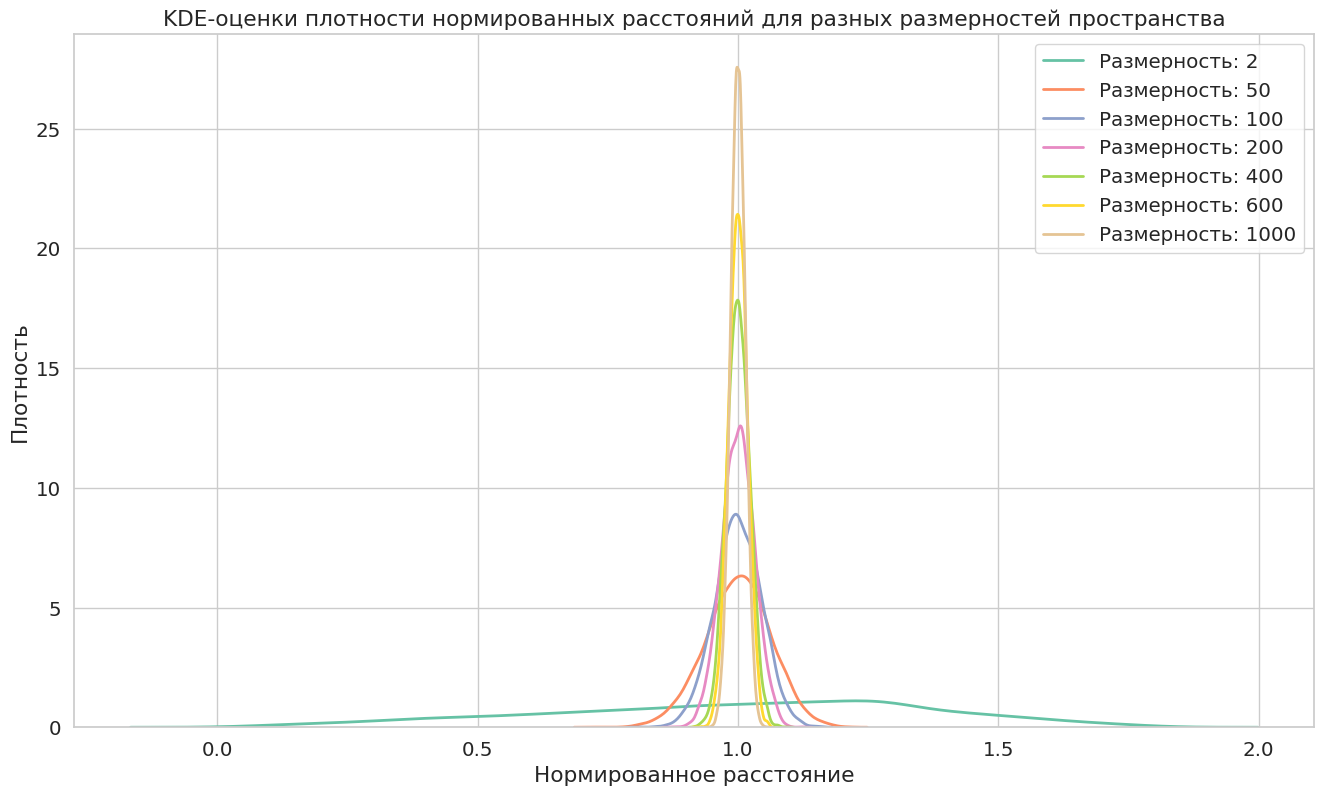

In [40]:
plot_kde(distances_normalized=point_distances_normalized, 
         title="KDE-оценки плотности нормированных расстояний для разных размерностей пространства",
         hue=point_dimensions,
         label="Размерность:")

Сделайте выводы
- Чем больше размерность, тем более ярко выражен пик в 1 по нормированному расстоянию: он становится выше и уже
- Для размерности 2 наблюдать пик не представляется возможным
- График симметричен относительно нормированного расстояния, равного 1 в силу равновероятного попадания точек налево и направо

---
### Задача 3.

В этой задаче мы попробуем кластеризовать различными способами изображения котиков из датасета с <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">семинара</a>.

Скачайте данные, загрузите их и отрисуйте несколько примеров.

Размерность cats: (15747, 12288)


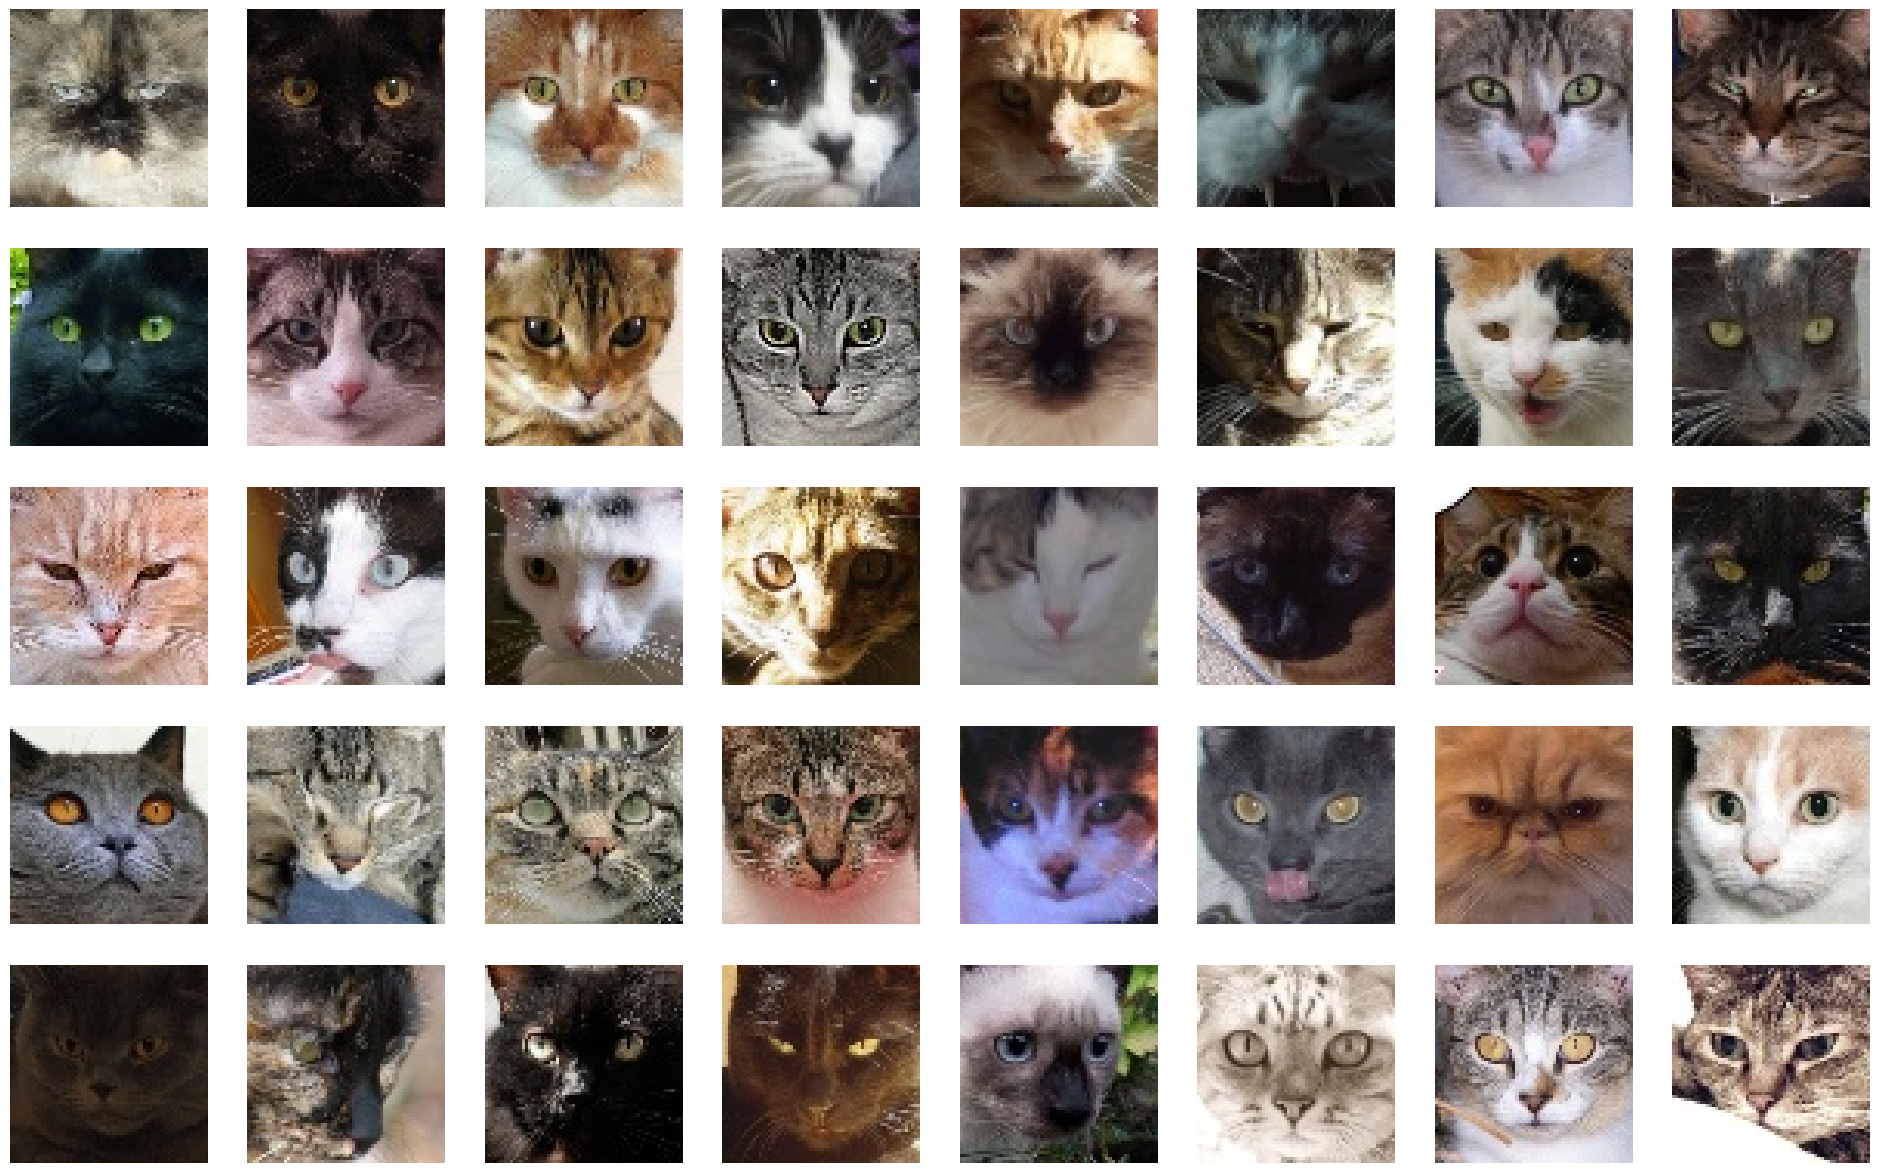

In [2]:
cats_path = "cats"
cats = []

for filename in os.listdir(cats_path):
    cats.append(matplt.imread(cats_path + "/" + filename))

cats = numpy.stack(cats).reshape(-1, 64 * 64 * 3)
print(f"Размерность cats: {cats.shape}")

# Визуализируем примеры
matplt.figure(figsize=(24, 15))
for i in range(40):
    matplt.subplot(5, 8, i + 1)
    matplt.imshow(cats[i].reshape(64, 64, 3))
    matplt.axis("off")

#### 1. Свойства метрики в пространстве котиков

Прежде всего давайте посмотрим, наблюдается ли проблема проклятия размерности в пространстве котиков, фактически повторив исследование предыдущей задачи. Для этого выберите не менее 10000 случайных пар изображений и посчитайте расстояния между ними. Визуализируйте <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценку плотности</a> нормированных расстояний.

Повторите те же действия к результату применения PCA, рассмотрев разное количество компонент, например, для 30, 100 и 500. Обратите внимание, что PCA нужно обучать на всех изображениях, а не только для тех, для которых вы будете считать расстояния. Примеры обучения PCA можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> с занятия.

- Посчитаем расстояние между изображениями и их средние и нормализованные значения и визуализируем KDE-оценку

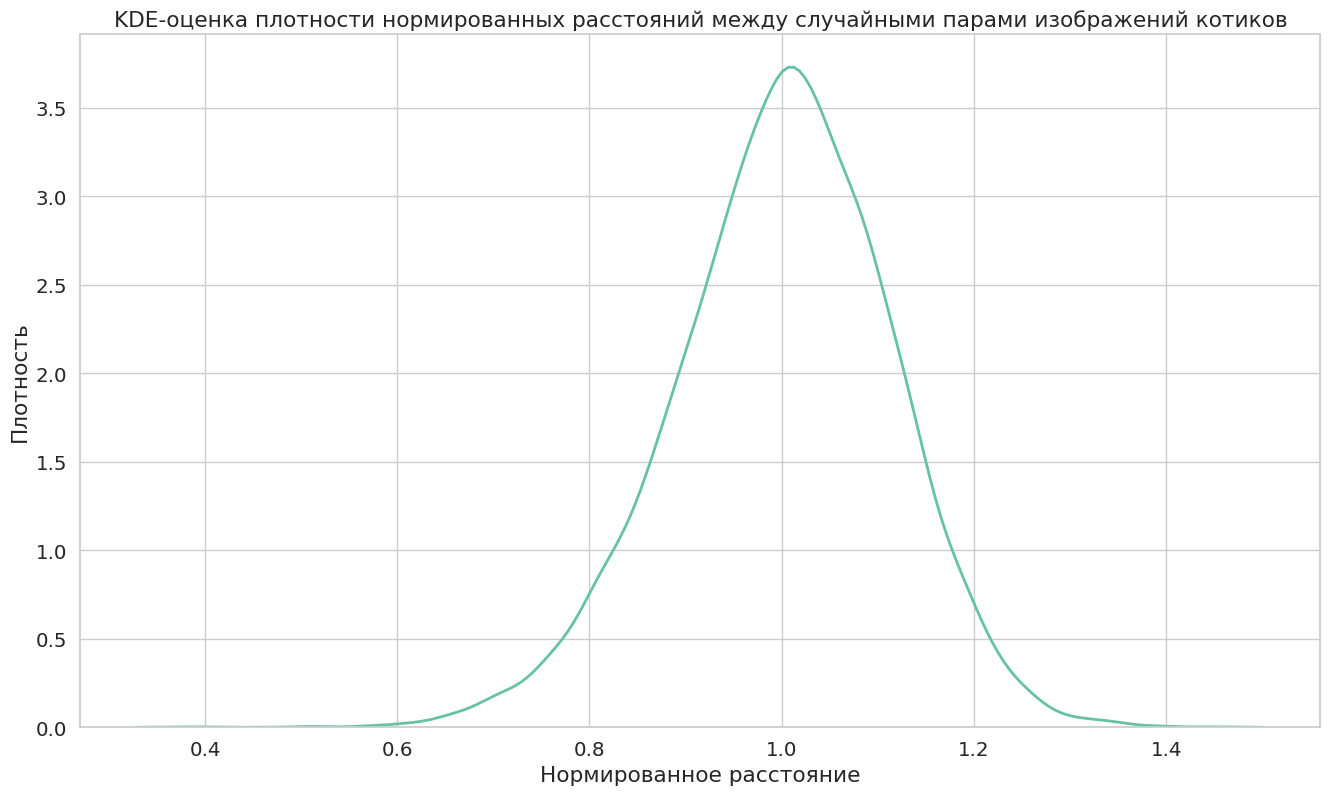

In [42]:
# Вычисление нормализованных расстояний между парами изображений
cats_distances_normalized = count_normalized(cats[numpy.random.choice(len(cats), size=sample_size)] - 
                                             cats[numpy.random.choice(len(cats), size=sample_size)])

plot_kde(distances_normalized=cats_distances_normalized,
         title="KDE-оценка плотности нормированных расстояний между случайными парами изображений котиков")

- Повторим для PCA для разных количеств компонент

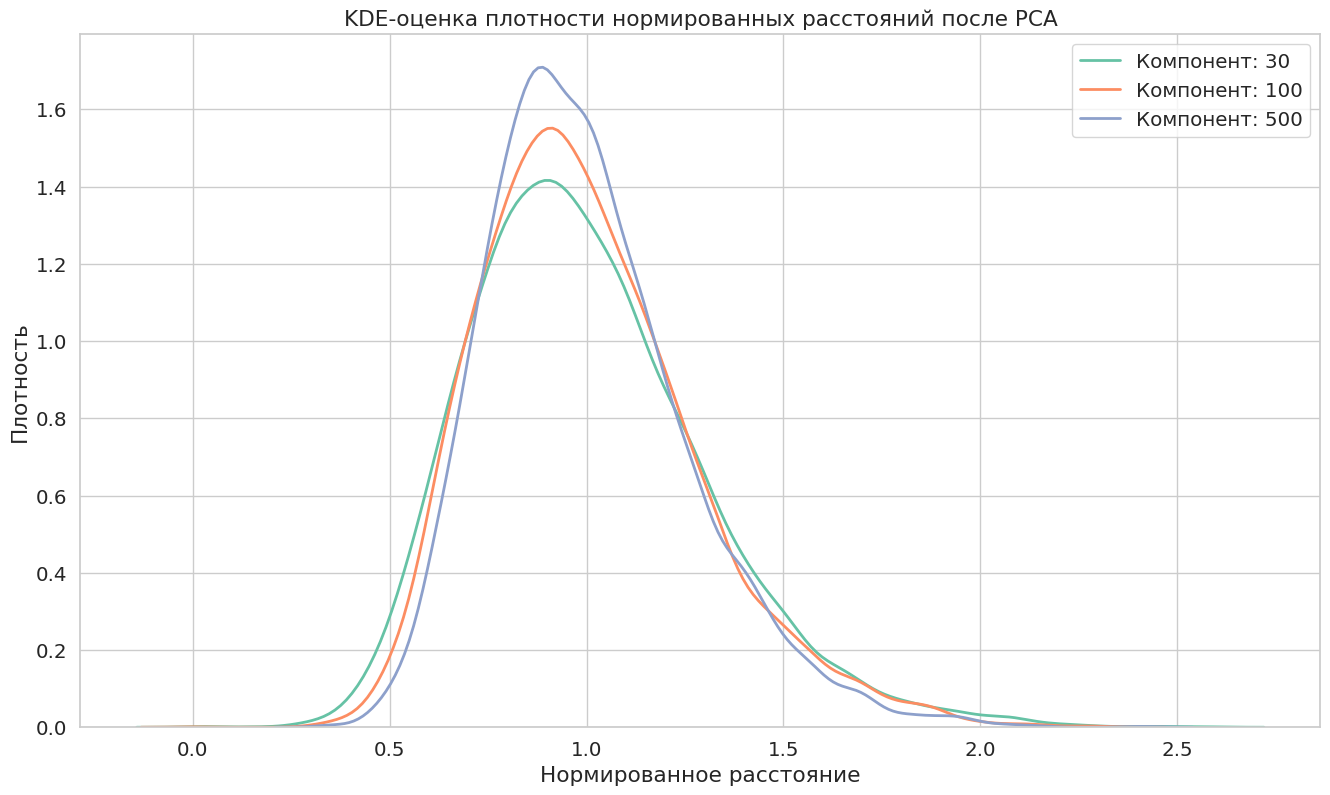

In [43]:
n_components_list = [30, 100, 500]

cats_pca_distances_normalized = []
for n_components in n_components_list:
    # Обучение PCA
    cats_various_pca = PCA(n_components=n_components)
    cats_various_projection = cats_various_pca.fit_transform(cats)
    cats_pca_distances_normalized.append(count_normalized(cats_various_projection[numpy.random.choice(len(cats_various_projection), size=sample_size)] -
                                                          cats_various_projection[numpy.random.choice(len(cats_various_projection), size=sample_size)]))

# Визуализация KDE-оценки плотности нормированных расстояний после преобразования PCA
plot_kde(distances_normalized=cats_pca_distances_normalized,
         title="KDE-оценка плотности нормированных расстояний после PCA",
         hue=n_components_list,
         label="Компонент:")

Сделайте выводы
- 

#### 2. Кластеризация котиков по вектору изображения

Начнем эксперименты с самого простого способа: каждое изображение можно вытянуть в вектор размерности $64 \cdot 64 \cdot 3$, их и попытаемся кластеризовать. Обучите по этим объектам метод KMeans, пример можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации

In [24]:
%%time
cats_simple_kmeans = KMeans(n_clusters=4, random_state=42)
cats_simple_clusters = cats_simple_kmeans.fit_predict(cats)

CPU times: user 22.9 s, sys: 5.33 s, total: 28.3 s
Wall time: 2.96 s


Теперь отобразим изображения на плоскость с помощью PCA и визуализируем полученные предсказания цветом, как это было сделано на семинаре для ответов на вопросы в бот. Ниже уже реализована функция отрисовки `visualize_images_clusterisation`, вам требуется лишь применить PCA и вызвать функцию с правильными параметрами.

In [27]:
def visualize_images_clusterization(images, projection, clusters, path, port=None):
    """
    Визуализиует двумерную проекцию эмбеддингов изображений,
    во всплывающем окне показывает сами изображения

    :param images: набор изображений
    :param projection: двумерная проекция изображений или эмбеддингов изображений
    :param clusters: предсказанные кластера
    :param port: опциональный параметр, порт на котором поднимается визуализация:
                 одинаковые порты - одинаковые графики, но если в ноутбуке открыто много портов, то могут начаться лаги
    :param path: пусть для экспорта графика
    """
    # Рисуем график с точками как на семинаре
    fig = pltex.scatter(
        x=projection[:, 0],
        y=projection[:, 1],
        hover_name=clusters,
        hover_data={"image_idx": list(range(len(images)))},
        color=clusters.astype(str),
        width=1000,
        height=800,
        title="PCA проекция изображений на плоскость",
        size=[1] * len(images),
        size_max=12,
    )
    
    fig.update_layout(legend=dict(title_text ="Кластер"), width=1600, height=900)

    # Добавляем во всплывающее окошко (hover box) изображения
    fig.update_traces(
        hoverinfo="none",
        hovertemplate=None,
    )

    app = Dash(__name__)

    app.layout = html.Div(
        className="container",
        children=[
            dcc.Graph(id="graph-2-dcc", figure=fig, clear_on_unhover=True),
            dcc.Tooltip(id="graph-tooltip-2", direction="bottom"),
        ],
    )

    @callback(
        Output("graph-tooltip-2", "show"),
        Output("graph-tooltip-2", "bbox"),
        Output("graph-tooltip-2", "children"),
        Output("graph-tooltip-2", "direction"),
        Input("graph-2-dcc", "hoverData"),
    )
    def display_hover(hover_data_par):
        """
        Настраивает всплывающее окно hover box.

        :param hover_data_par: Данные соответствующей точки
        """
        if hover_data_par is None:
            return False, no_update, no_update, no_update

        # Достаем индекс картинки, который выше положили в hover_data
        hover_data = hover_data_par["points"][0]
        image_idx = hover_data["customdata"][0]
        # И получаем само изображение кота
        image = Image.fromarray(images[image_idx].reshape(64, 64, 3))

        # Преобразовываем изображение в base64 кодировку
        buffer = io.BytesIO()
        image.save(buffer, format="jpeg")
        encoded_image = base64.b64encode(buffer.getvalue()).decode()
        image_url = "data:image/jpeg;base64, " + encoded_image

        image_children = [
            html.Img(
                src=image_url,
                style={"width": "196px"},
            ),
        ]

        return True, hover_data["bbox"], image_children, "top"

    if port is None:
        port = str(numpy.random.randint(5000, 15000))
    app.run(port=port, debug=True, jupyter_height=800)
    fig.write_html(path)

    return app

- Визуализируем полученные кластера и сохраним график в файл `cats_simple_projection.html`:

In [28]:
cats_simple_pca = PCA(n_components=2)
cats_simple_projection = cats_simple_pca.fit_transform(cats)

visualize_images_clusterization(cats, cats_simple_projection, cats_simple_clusters, "cats_simple_projection.html")

Для каждого кластера нарисуйте по 5-10 типичных изображений, то есть ближайших к центру кластера. Похожую операцию мы видели на занятии в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации.

*Примечание.* Для одного кластера рисуйте картинки "в строчку". Так будет удобно как вам самим, так и проверяющему. Примеры можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> по PCA.

- Определим функцию, визуализирующую несколько примеров каждого кластера

In [21]:
def show_examples(images, projection, clusters, num_examples=8):
    """Функция, визуализирующая примеры для кластеров

    Args:
        images: фотографии (данные)
        projection: массив проекция на плоскость PCA
        clusters: массив распределения по кластерам
        num_examples: количество примеров для визуализации, по умолчанию 8
    """
    
    clusters_examples = []
    
    for cluster in numpy.unique(clusters):
        cluster_points = projection[clusters == cluster]
        cluster_center = cluster_points.mean(axis=0)
    
        # Сортируем расстояния и берем индексы в порядке возрастания расстояний
        closest_indexes = numpy.argsort(numpy.linalg.norm(cluster_center - cluster_points, axis=1))
        closest_images_all = images[clusters == cluster][closest_indexes]
        closest_images_ind = numpy.unique(closest_images_all, axis=0, return_index=True)[1]
        closest_images_unique = [closest_images_all[idx] for idx in sorted(closest_images_ind)]
    
        # Берем топ-num_examples уникальных ответов, соответствующих полученным индексам
        clusters_examples.append(closest_images_unique[:num_examples])
    
    matplt.figure(figsize=(24, 13.5))
    for idx, cluster_examples in enumerate(clusters_examples):
        for jdx, example in enumerate(cluster_examples):
            matplt.subplot(4, num_examples, idx * num_examples + jdx + 1)
            matplt.imshow(example.reshape(64, 64, 3))
            matplt.title(f"Кластер {idx}\n Пример {jdx + 1}", fontdict={'size': 10})
            matplt.axis('off')
    matplt.show()


- Теперь отрисуем картинки по кластерам

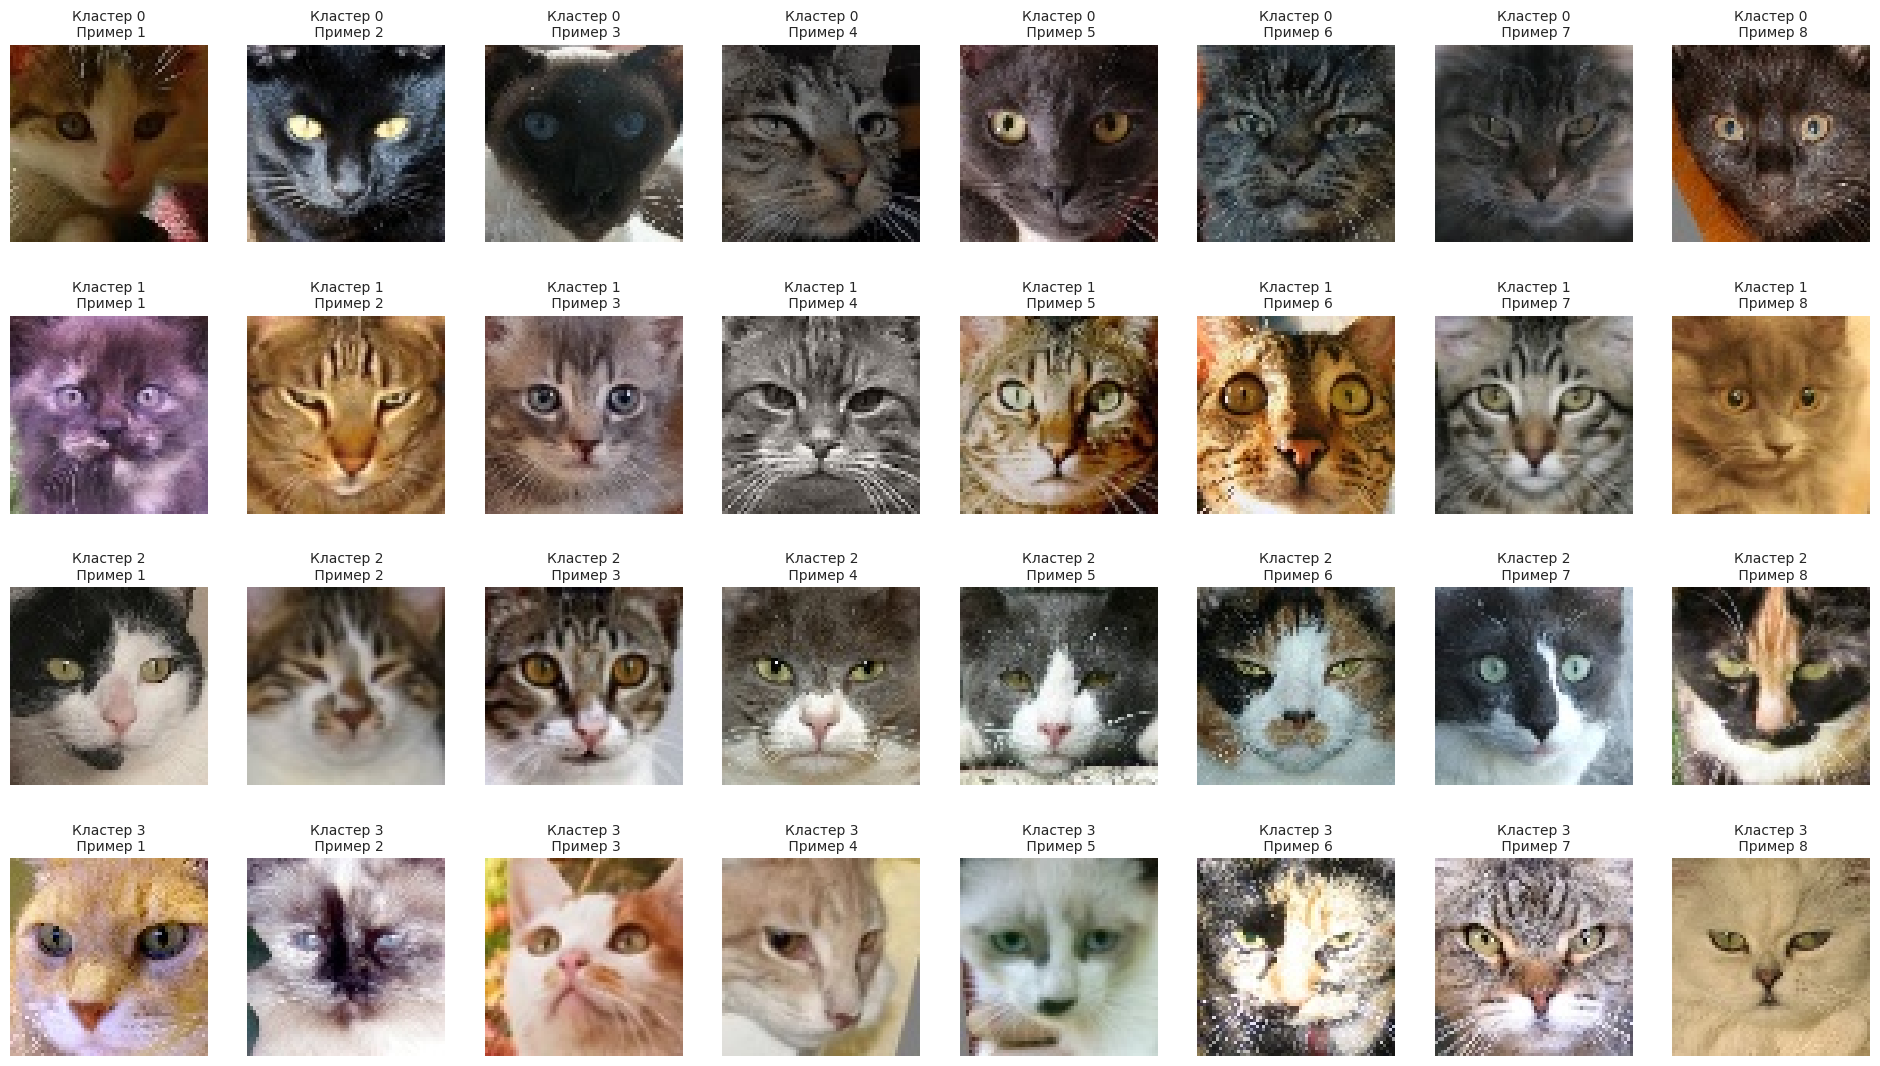

In [29]:
show_examples(cats, cats_simple_projection, cats_simple_clusters)

Наблюдаются ли какие-то закономерности в изображениях внутри одного кластера? Если да, то опишите отличительные черты кластеров.
- Наблюдаются. Коты внутри одного кластера имеют схожий окрас. Не стану называть номера кластеров, так как они меняются в зависимости от запуска, но типы котов по кластерам остаются постоянными. А именно:
  - В одном из кластеров коты с темным сиамским окрасом (я плохо разбираюсь в окрасах котов, но он такой, полосатый, как у стандартных уличных кошек) и с серым или черным цветом шерсти. Фотографии так же темные. Но есть и исключения, которые получились из-за схожести общей цветовой гаммы фотографии. Присутствуют несколько котов, у которых баланс цветов на фото путает модель и она считает, что на них коты того же окраса.
  - В другом кластере все коты имеют светлый полосатый окрас, а фотографии сделаны с большей яркостью и лучшим освещением, вероятно, большинство под солнцем
  - В еще одном кластере находятся коты с белой шерсткой снизу головы и шеи и черной или темно-коричневой окантовкой вокруг глаз и макушкой, некоторые имеют рыжую полоску
  - В последнем кластере оказались белые и рыжие коты. Присутствует пара совсем засветленных фотографий с котами из других кластеров
- Рассматривая построенную выше PCA-проекцию на плоскость мы видим, что классы с темными и белыми котами друг другу на графике, и эти кластеры не имеют общей границы. Рассматривая точки на графике мы можем наблюдать плавный переход котов от одного окраса к другому, соответствующим определенным классам.
- Коты с одинаковым окрасом могут иметь разную породу, то есть, кластеризация не гарантирует разбиение животных на породы

Подумайте, чем может быть плох такой подход? Какая проблема могла возникнуть и возникла ли? Обратите внимание на проведенное ранее исследование.
- Модель, в том числе ориентируется на стиль фотографии: например светлый кот на темной фотографии будет отнесен не к тому кластеру, что выражается в ошибках, описанных ниже. То есть, результат отчасти зависит от яркости фото, что некорректно

#### 3. PCA + кластеризация

Попробуем уменьшить размерность перед кластеризацией с помощью PCA, спроектировав изображения на первые несколько главных компонент 

**Примечание.** Не стоит брать больше 100 главных компонент

Сделайте кластеризацию:

In [30]:
%%time

cats_pca_prepare = PCA(n_components=64)
cats_converted_images = cats_pca_prepare.fit_transform(cats)

# Кластеризация методом KMeans
cats_converted_kmeans = KMeans(n_clusters=4, random_state=42)
cats_converted_clusters = cats_converted_kmeans.fit_predict(cats_converted_images)

CPU times: user 1min 32s, sys: 37.9 s, total: 2min 10s
Wall time: 6.65 s


- Визуализируем полученные кластера и сохраним график в файл `cats_converted_projection.html`:

In [31]:
cats_converted_pca = PCA(n_components=2)
cats_converted_projection = cats_converted_pca.fit_transform(cats_converted_images)
visualize_images_clusterization(cats, cats_converted_projection, cats_converted_clusters, "cats_converted_projection.html")

Нарисуйте по 5-10 типичных изображений для новых кластеров

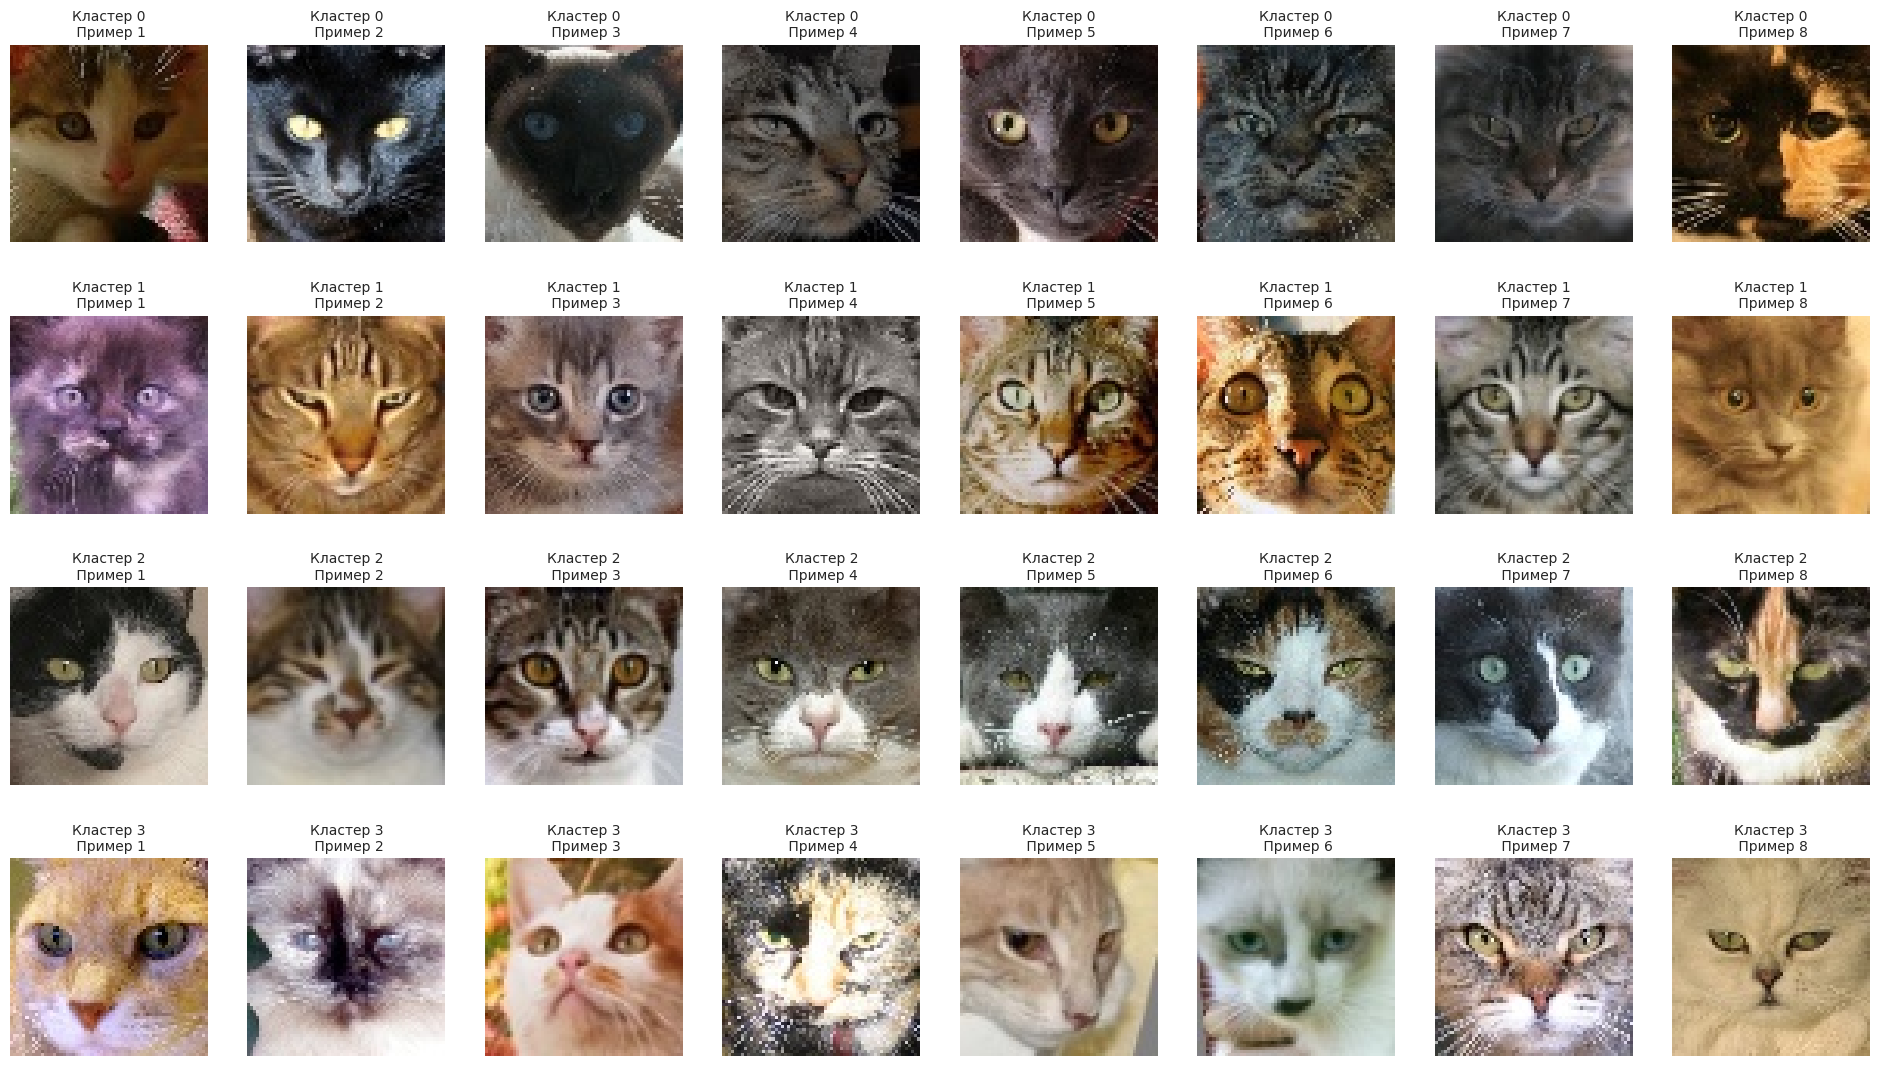

In [32]:
show_examples(cats, cats_converted_projection, cats_converted_clusters)

Опишите отличительные черты кластеров:
- Закономерность снова наблюдается. Коты внутри одного кластера имеют схожий окрас. Отличительные черты остались те же, что и в прошлый раз
- Рассматривая построенную выше PCA-проекцию на плоскость мы видим, что определенные два класса противоположны друг другу, что неудивительно: в них коты темного и белого окраса соответственно, и эти кластеры не имеют общей границы. Рассматривая точки на графике мы можем наблюдать плавный переход котов от одного окраса к другому, соответствующим определенным классам.

Сильно ли они отличаются от предыдущего способа?
- Почти незаметно. Смотря на график отличия можно заметить только изучая отдельные точки и фотографии на графиках

#### 4. Нейросетевые эмбеддинги + кластеризация

Попробуем применить к изображениям такой же подход, как с текстами. То есть возьмем хорошую уже обученную нейросеть, получим с ее помощью эмбеддинги изображений и будем дулеть кластеризацию этих эмбеддингов.

Выберите на <a target="_blank" href="https://huggingface.co/models">huggingface</a> модель для получения эмбеддингов изображений.

**Примечания**
- Нам нужны `CV` модели для задачи извлечения признаков (в фильтрах huggingface называются `Image Feature Extraction`).
- Не выбирайте слишком тяжелые модели (с суффиксами `-huge`, `-giant`, `-large` и прочим), нам это ни к чему, так как картинки маленькие и простые. К тому же это замедлит предсказание эмбеддингов.
- Обычно в карточке модели есть пример применения, который можно скопировать и как в семинаре в цикле применить ко всем батчам изображениям.
- Некоторые модели могут возвращать не эмбеддинг размерности `(D,)`, а матрицу признаков размерности `(n, D)`, в этому случае надо применить average-pooling, усреднив по предпоследней оси.

Загрузите модель, примените к одному тестовому изображению кота и посмотрите на размерность полученного тензора

- Для получения эмбеддингов изображений мы можем воспользоваться моделью `vit-base-patch16-224-in21k` от Google, которая хорошо подходит для решения задачи классификации изображений и получения их отличительных особенностей. 

In [3]:
cats_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
cats_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

- Применим к одному тестовому изображению кота

In [8]:
cats_inputs_one = cats_processor(images=cats[0].reshape(64, 64, 3), return_tensors="pt")

with torch.no_grad():
    cats_outputs_one = cats_model(**cats_inputs_one)
print(cats_outputs_one.last_hidden_state.shape)

torch.Size([1, 197, 768])


- Теперь примените загруженную модель ко всем картинкам

In [5]:
# Применение модели к каждому изображению
cats_inputs = cats_processor(images=cats.reshape((cats.shape[0], 64, 64, 3)), return_tensors="pt")

with torch.no_grad():
    cats_outputs = cats_model(**cats_inputs)
print(cats_outputs.last_hidden_state.shape)

torch.Size([15747, 197, 768])


In [ ]:
# Применение модели к каждому изображению
cats = cats[:8000]
cats_inputs = cats_processor(images=cats.reshape((cats.shape[0], 64, 64, 3)), return_tensors="pt")

with torch.no_grad():
    cats_outputs = cats_model(**cats_inputs)
print(cats_outputs.last_hidden_state.shape)

Сделайте кластеризацию полученных эмбеддингов

In [34]:
%%time

cats_nn_images = cats_outputs.last_hidden_state.reshape((cats.shape[0], 197 * 768))
cats_nn_kmeans = KMeans(n_clusters=4, random_state=42)
cats_nn_clusters = cats_nn_kmeans.fit_predict(cats_nn_images)

CPU times: user 1min 34s, sys: 9.11 s, total: 1min 43s
Wall time: 12.9 s


- Визуализируем полученные кластера и сохраним график в файл `cats_nn_projection.html`:

In [35]:
cats_nn_pca = PCA(n_components=2)
cats_nn_projection = cats_nn_pca.fit_transform(cats_nn_images)
visualize_images_clusterization(cats, cats_nn_projection, cats_nn_clusters, "cats_nn_projection.html")

Нарисуйте по 5-10 типичных изображений для новых кластеров

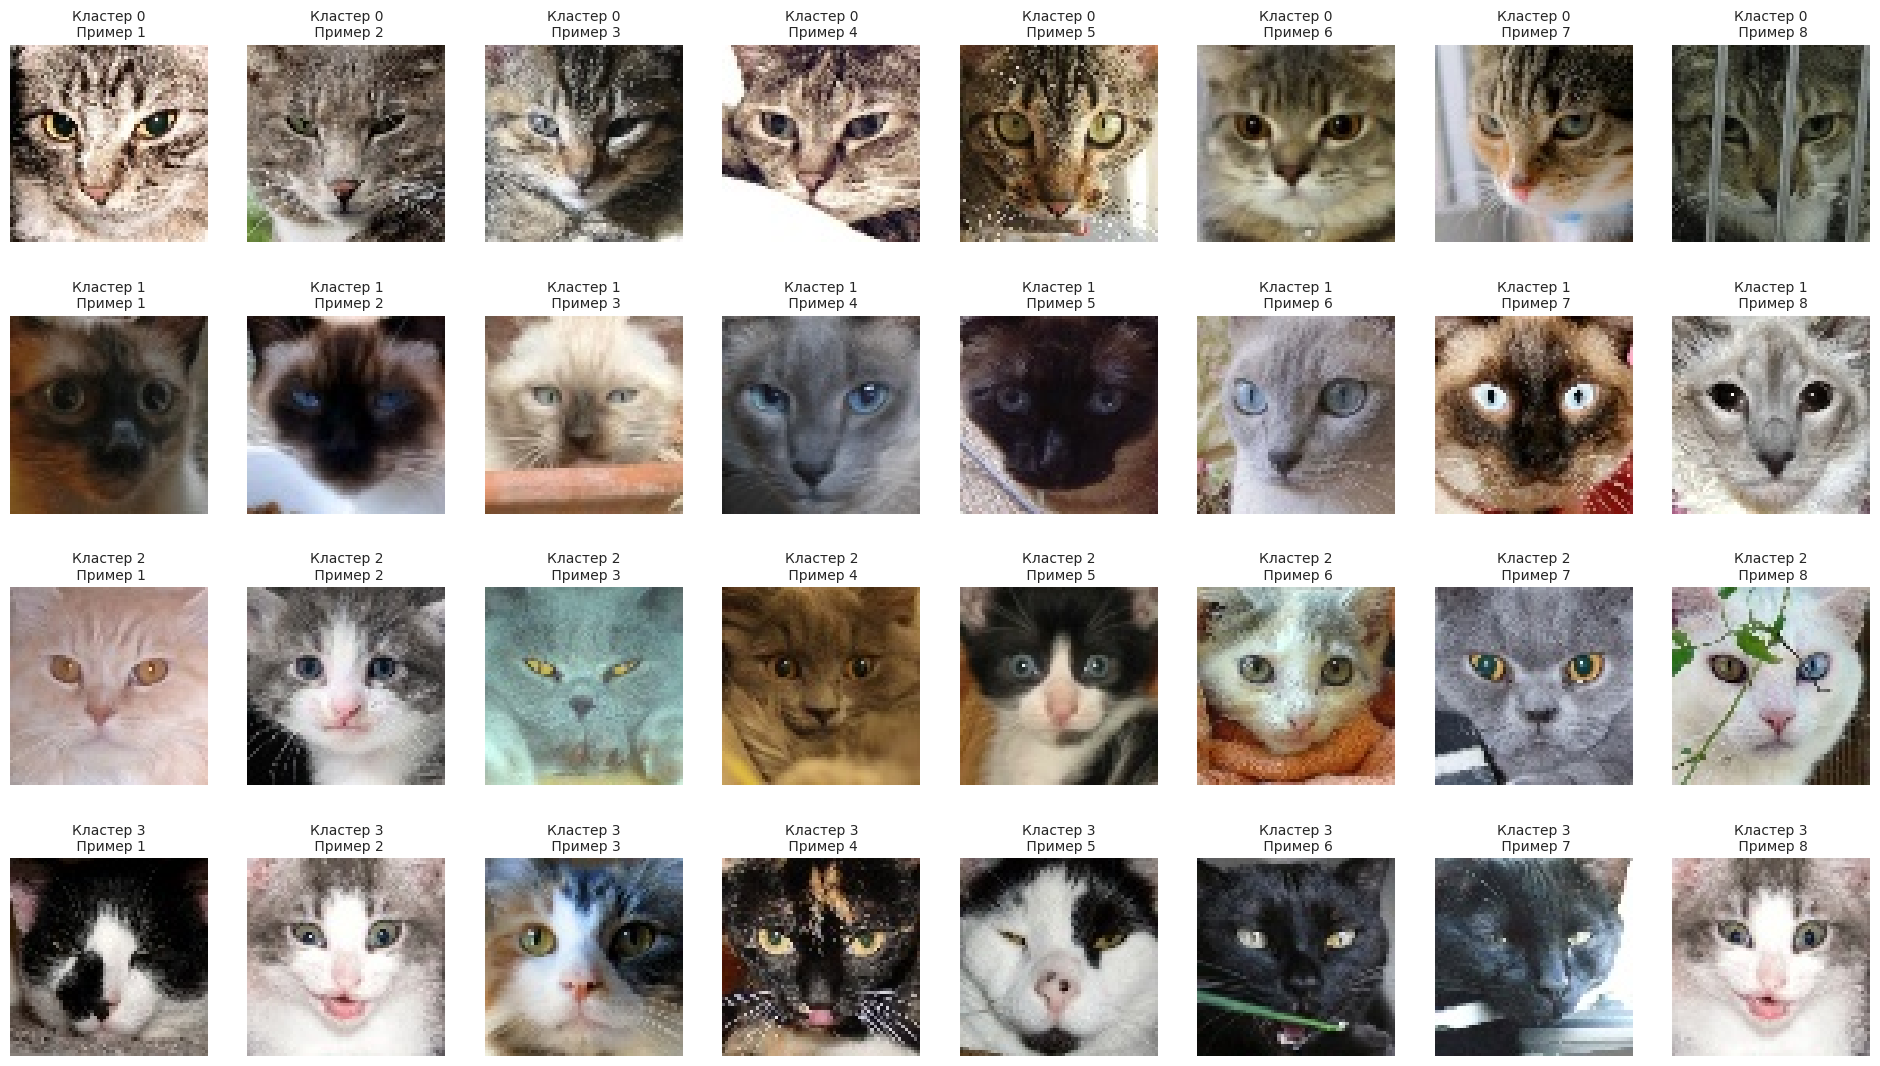

In [36]:
show_examples(cats, cats_nn_projection, cats_nn_clusters)

Опишите отличительные черты кластеров:
- Коты внутри одного кластера имеют схожий окрас. Не стану называть номера кластеров, так как они меняются в зависимости от запуска, но типы котов по кластерам остаются постоянными. А именно:
  - В одном из кластеров коты с серым или коричневым окрасом в черную вертикальную полоску. На примерах можно считать, что все коты действительно одинаковой породы, учитывая практически полную схожесть по окрасу
  - В другом кластере все коты сиамской породы: с темной мордочкой и другого цвета шерстью вокруг
  - В еще одном кластере находятся коты со сплошным окрасом: серым или белым, сюда же попали коты с белой шерсткой снизу головы и шеи и черной или темно-коричневой окантовкой вокруг глаз и макушкой. Этот класс переходный между сиамским и следующим
  - В последнем кластере оказались темные коты, возможно, имеющие белую мордочку
- Во всех кластерах коты были разделены скорее по породе, нежели по стилю фотографии, что имеет большую информативность

Чем отличаются кластеры, полученные этим способом от первых двух?
- Теперь кластеры лучше связаны с породой котов - именно стилю окраса, а не конкретному цвету, потому коты разделены по ней, а не по окрасу.
- Так же результаты меньше зависят от стиля фотографии, в то время как для двух предыдущих способов результаты были сильно привязаны к яркости, экспозиции и качеству фото. 
- Соответственно, сменились кластеры и распределение точек на графике

#### 5. Выводы
Сделайте выводы: 
- Мы классифицировали котов по породе (окрасу) тремя разными способами
- Первые два способа: с применением PCA до кластеризации и без применения дают схожий результат: коты успешно классифицируются, но кластеры сильно зависят от внешних факторов: освещенности и качества фото. Так же коты внутри класса связаны друг с другом цветом окраса, что затрудняет разделение по породе
- Третий способ с использованием нейросети от Google справился более успешно: он практически полностью сумел отойти от привязки к качеству фото и конкретному цвету котов, что помогло ему разделить животных по породе лучше. 